#### Глава 2
#### 2.1 Цифровое изображение. Чтение, запись, работа с пикселями
Предположим, что вы хотите хранить цветные изображения с указанием прозрачности каждого пикселя. Для каждого пикселя потребуется хранить четыре числа: три цветных компоненты (R, G и B) со значениями в диапазоне [0..31] каждая и компоненту прозрачности — число в диапазоне [0..63]. Сколько бит потребуется для хранения значений одного пикселя?

**Ответ:**
5 * 3 + 6 = 21

#### Количество столбцов
Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [11]:
from skimage.io import imread, imshow, imsave
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = imread('https://stepik.org/media/attachments/lesson/58180/img.png')
img.shape[1]

419

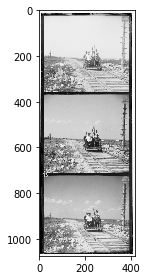

In [12]:
imshow(img)

#### Изменение цвета пикселя изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл out_img.png.

In [13]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color.png')
img_with_green_pixel = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color-green-pixel.png')

x1 = img.shape[0]//2
x2 = img.shape[1]//2

img[x1, x2] = [102, 204, 102]

#imsave('out_img.png', img)
print('Результат сравнения:', np.array_equal(img, img_with_green_pixel))

Результат сравнения: True


#### Изменение цвета прямоугольника|
Загрузите изображение из файла img.png. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл out_img.png.

In [14]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-gray.png')
img_with_pink_pixeles = imread('https://stepik.org/media/attachments/lesson/58180/tiger-pink.png')

x = img.shape[0]//2
y = img.shape[1]//2
img[x - 3: x + 4, y - 7:y + 8] = [255, 192, 203]

print('Результат сравнения', np.array_equal(img, img_with_pink_pixeles))

Результат сравнения True


#### Определение рамки изображения
Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

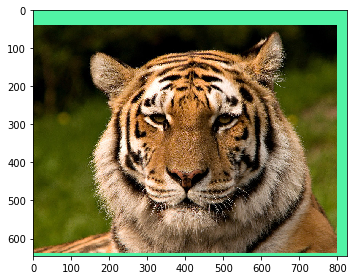

In [15]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-border.png')
imshow(img)
plt.show()

In [16]:
border_color = img[0, 0]

row = img.shape[0] // 2
col = img.shape[1] // 2

for i in range(img.shape[0]):
    if (not np.array_equal(img[i, col], img[i+1, col])) and np.array_equal(img[i, col], border_color):
        #print('Верхняя граница', i + 1) # +1, так как индексация с 0
        a2 = i + 1 
    if (not np.array_equal(img[i, col], img[i-1, col])) and np.array_equal(img[i, col], border_color):
        #print('Нижняя граница', img.shape[0] - i)
        a4 = img.shape[0] - i
        break
    
for i in range(img.shape[1]):
    if (not np.array_equal(img[row, i], img[row, i+1])) and np.array_equal(img[row, i], border_color):
        #print('Левая граница', i + 1) # +1, так как индексация с 0
        a1 = i + 1 
    if (not np.array_equal(img[row, i -1], img[row, i])) and np.array_equal(img[row, i], border_color):
        #print('Правая граница', img.shape[1] - i)
        a3 = img.shape[1] - i
        break
    
print(a1, a2, a3, a4)

1 39 25 7


#### 2.2 Арифметические операции. Каналы. Вычисление яркости изображения

#### Вычисление негатива изображения
Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл out_img.png.

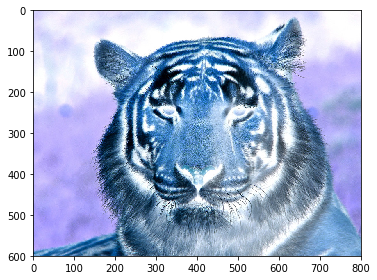

Результат сравнения: True


In [17]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_negative = imread('https://stepik.org/media/attachments/lesson/58181/tiger-negative.png')

img = 255 - img

imshow(img)
plt.show()

print('Результат сравнения:', np.array_equal(img, img_negative))

#### Поменять местами каналы изображения
У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG.

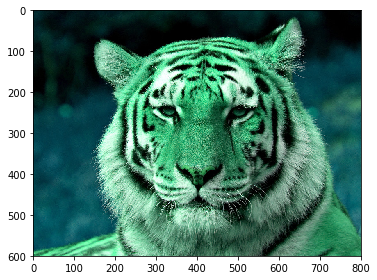

Результат сравнения: True


In [18]:
img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_brg = imread('https://stepik.org/media/attachments/lesson/58181/tiger-brg.png')

r = img[:,:, 0]
g = img[:,:, 1]
b = img[:,:, 2]

from numpy import dstack

img = dstack((b,r,g))

imshow(img)
plt.show()

print('Результат сравнения:', np.array_equal(img, img_brg))

#### Подсчет яркости изображения
Подсчитайте яркость этого изображения и сохраните в файл out_img.png. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу Y=0.2126⋅R+0.7152⋅G+0.0722⋅B, не забудьте сначала перевести изображение в вещественные числа (функция img_as_float), а затем в целые числа (функция img_as_ubyte).

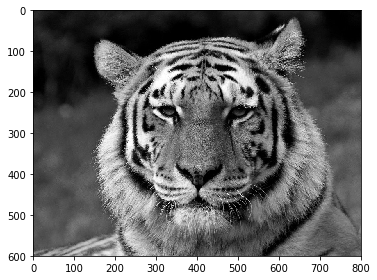

Результат сравнения: True


In [19]:
from skimage import img_as_float, img_as_ubyte

img = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_y = imread('https://stepik.org/media/attachments/lesson/58181/tiger-y.png')

img = img_as_float(img)

r = img[:,:, 0]
g = img[:,:, 1]
b = img[:,:, 2]

img = 0.2126 * r + 0.7152 * g + 0.0722 * b
img = img_as_ubyte(img)

imshow(img)
plt.show()

print('Результат сравнения:', np.array_equal(img, img_y))

#### 2.3 Сопоставление фотографий Прокудина-Горского

#### Сопоставление фотографий Прокудина-Горского
Напишите функцию align, которая сопоставляет изображения с фотографий Прокудина-Горского и возвращает координаты точек на синем и красном каналах, как это описано в видео, слайдах и описании задания.
Прототип функции:
```
def align(img, g_coord):
    row_g, col_g = g_coord
    # считаем сдвиги каналов

    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (row_b, col_b), (row_r, col_r)
```
Для вашего удобства приводится один тест. Вход: ссылка на изображение, координаты точки на зеленом канале. Выход: правильный ответ — координаты точек на синем и красном каналах.

Программа не должна ничего читать и писать на стандартный ввод и вывод, необходимо написать только функцию align.
Программа тестируется на 10 картинках: 00.png, 01.png, 02.png, 03.png, 04.png, 05.png, 06.png, 07.png, 08.png, 09.png. Однако координаты точек приводятся только для первого изображения. Проверьте перед посылкой решения в систему, что программа верно работает на остальных девяти изображениях. Для этого достаточно проверить, что изображения сопоставляются качественно, без визуальных артефактов.

In [20]:
from numpy import roll
from math import ceil

# фукнция нахождения сдвига с максимальной корреляцией
def shift(img_1, img_2):
    max_corr = -1

    for row in range(-15, 16):
        img_with_row_shift = roll(img_1, row, axis = 0)
        for col in range(-15, 16):
            img_with_row_and_col_shift = roll(img_with_row_shift, col, axis = 1)
            current_corr = (img_with_row_and_col_shift * img_2).sum()
            
            if current_corr > max_corr:
                max_corr = current_corr
                row_shift = row
                col_shift = col
    return row_shift, col_shift

def align(img, g_coord):
    row_g, col_g = g_coord

    # преобразование значений изображения в вещественные
    img_f = img_as_float(img)
    
    height = img.shape[0]
    #width = img.shape[0]
    
    # разделение изображения на три части (b, g и r)
    
    color_height = img_f.shape[0] // 3
    
    B = img_f[0 : color_height, :]
    G = img_f[color_height : color_height * 2, :]
    R = img_f[color_height * 2 : color_height * 3, :]

    #pix_height = ceil(0.05 * color_height)
    #pix_width = ceil(0.05 * width)
    
    #B = img_f[pix_height : color_height - pix_height, pix_width : width - pix_width]
    #G = img_f[color_height + pix_height: color_height + color_height - pix_height, pix_width : width - pix_width]
    #R = img_f[height - color_height + pix_height : height - pix_height, pix_width : width - pix_width]
    
    # поменяем местами каналы в порядок RGB
    img_f = dstack((R, G, B))
    
    # обрежем рамку 
    shft = 30 
    rows, columns, _ = img_f.shape
    img_f = img_f[shft : rows - shft, shft : columns - shft]
    
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    
    # синий относительно зеленого
    row_shift, col_shift = shift(B, G)
    
    # смещение координат зеленой точки по синему каналу
    row_b = row_g - row_shift - color_height #(высота канала)
    col_b = col_g - col_shift 
    
    B_shift = roll(B, row_shift, axis = 0)
    B_shift = roll(B_shift, col_shift, axis = 1)
    
    # красный относительно зеленого
    row_shift, col_shift = shift(R, G)
    
    # смещение координат красной точки по зеленому каналу
    row_r = row_g - row_shift + color_height
    col_r = col_g - col_shift

    R_shift = roll(R, row_shift, axis = 0)
    R_shift = roll(R_shift, col_shift, axis = 1)
    
    imshow(dstack((R_shift, G, B_shift)))

    return (row_b, col_b), (row_r, col_r)

((-14, 550), (690, 552))

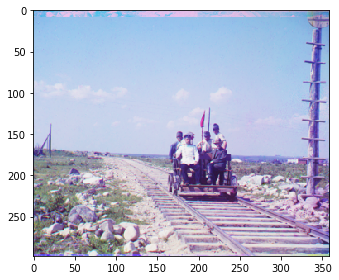

In [21]:
img = imread('https://stepik.org/media/attachments/lesson/58182/00.png')
align(img, (341, 551))

((3, 551), (674, 550))

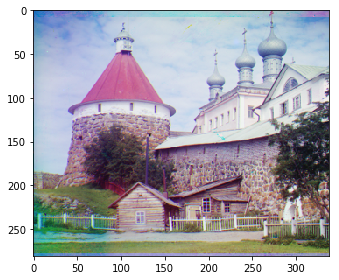

In [22]:
img = imread('https://stepik.org/media/attachments/lesson/58182/01.png')
align(img, (341, 551))

((-12, 553), (692, 550))

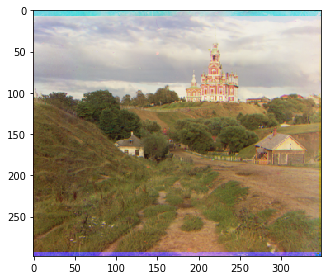

In [23]:
img = imread('https://stepik.org/media/attachments/lesson/58182/02.png')
align(img, (341, 551))

((-43, 551), (724, 548))

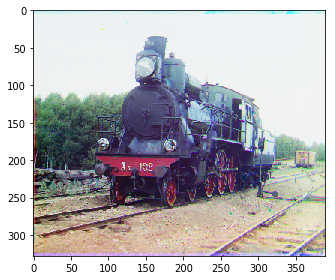

In [24]:
img = imread('https://stepik.org/media/attachments/lesson/58182/03.png')
align(img, (341, 551))

((-45, 552), (722, 550))

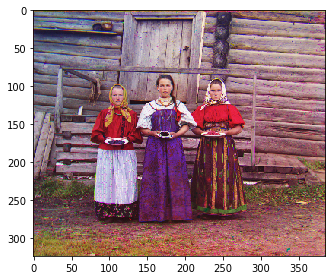

In [25]:
img = imread('https://stepik.org/media/attachments/lesson/58182/04.png')
align(img, (341, 551))

((-42, 553), (722, 549))

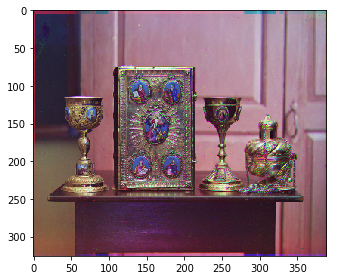

In [26]:
img = imread('https://stepik.org/media/attachments/lesson/58182/05.png')
align(img, (341, 551))

((-42, 554), (722, 548))

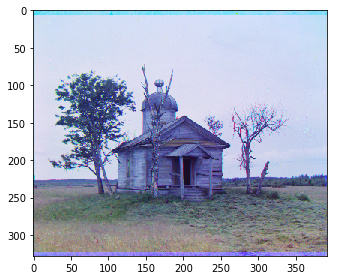

In [27]:
img = imread('https://stepik.org/media/attachments/lesson/58182/06.png')
align(img, (341, 551))

((-6, 551), (687, 552))

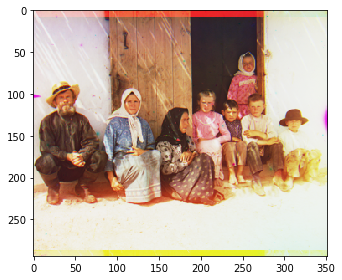

In [28]:
img = imread('https://stepik.org/media/attachments/lesson/58182/07.png')
align(img, (341, 551))

((-38, 556), (719, 548))

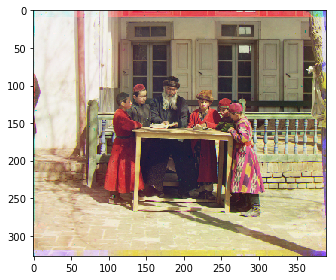

In [29]:
img = imread('https://stepik.org/media/attachments/lesson/58182/08.png')
align(img, (341, 551))

((-38, 554), (719, 549))

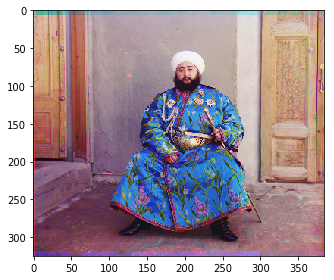

In [30]:
img = imread('https://stepik.org/media/attachments/lesson/58182/09.png')
align(img, (341, 551))